In [2]:
### importing libraries
import pandas as pd  ### pandas FOR  data analysis  
import numpy as np  ### numpy for basic numerical computations 
import matplotlib.pyplot as plt  ###  plotting libraries
import seaborn as sns ### seaborn for adding more style in plotting
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_excel("bankmarketing.xls")  ### loading csv dataset
df.head(10)  ### displaying datset of 10 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()  ### finding the number of missing data in each columns

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        print()
        print(f'Name of Feature is: {col} and unique values are: {df[col].unique()}')
        print("############################################################################################")
        print()


Name of Feature is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
############################################################################################


Name of Feature is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']
############################################################################################


Name of Feature is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
############################################################################################


Name of Feature is: default and unique values are: ['no' 'unknown' 'yes']
############################################################################################


Name of Feature is: housing and unique values are: ['no' 'yes' 'unknown']
#############

# Exploatory Data Analysis

### Univariate Analysis for Categorical Variable

In [9]:
# Function for annotation 
def annotation():  ### here i creat the function for applying labels in each graphs
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='black',rotation = 45,ha='center',va='bottom')
  # rotate numbers to 45 degree, gives red color, fi

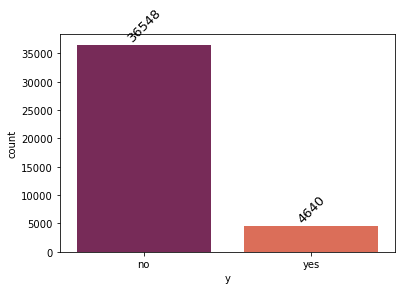

In [10]:
# analysisng target variable
ax = sns.countplot(x = df["y"],palette="rocket")  #Imbalanced dataset
annotation()
plt.show()

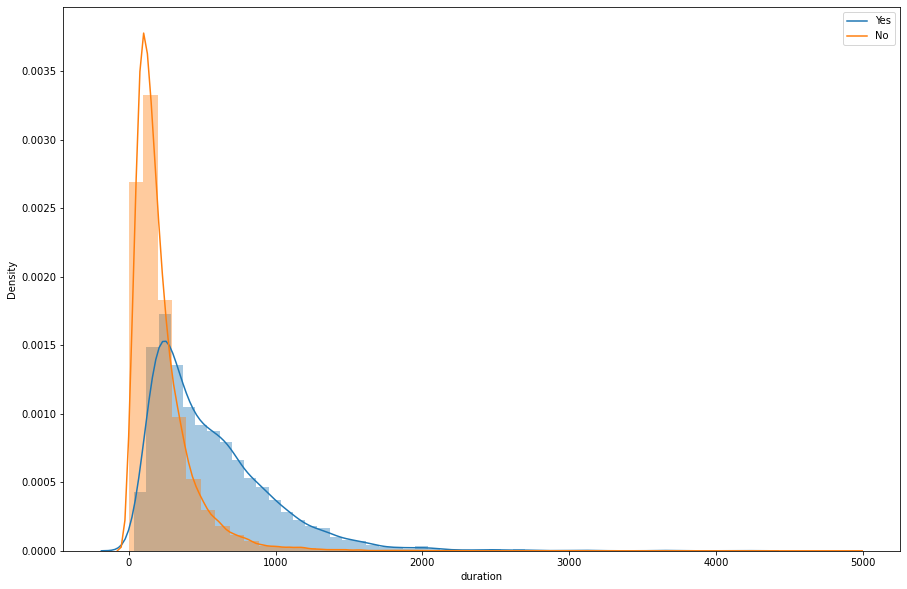

In [11]:
### comparing duration and deposit
plt.figure(figsize=(15,10))
sns.distplot(df[df['y']=='yes']['duration']) ### plotting yes values
sns.distplot(df[df['y']=='no']['duration']) ### plotting no values
plt.legend(labels=['Yes','No']) ## labels

plt.show()

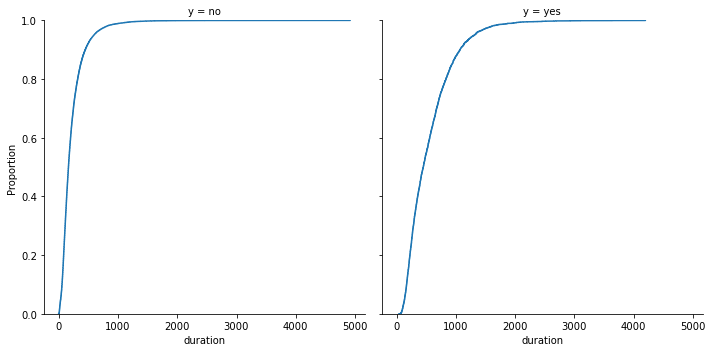

In [12]:
sns.displot(df, x="duration",col="y", kind="ecdf")

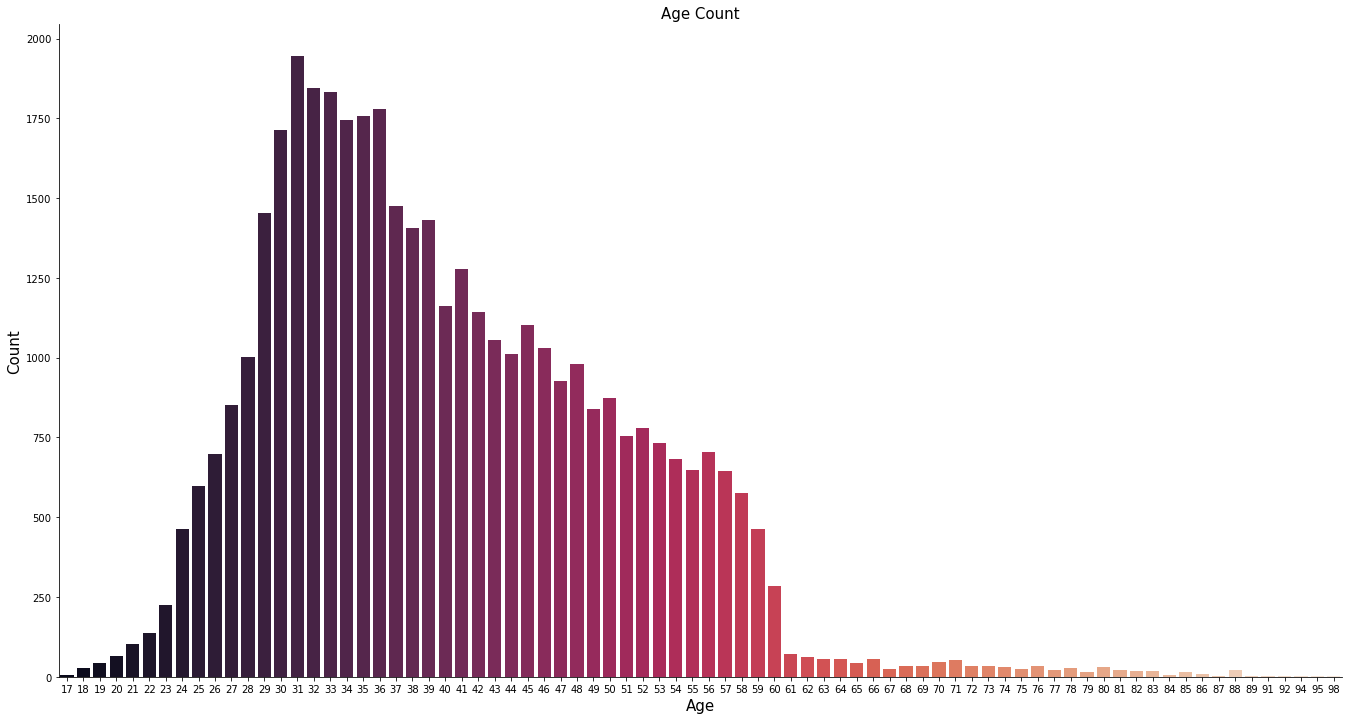

In [13]:
### distribution of age
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) ### size of chart
sns.countplot(x = 'age', data = df,palette="rocket") ### countplot, age from 18 to 95
axis.set_xlabel('Age', fontsize=15) ### x axis
axis.set_ylabel('Count', fontsize=15) ###  y axis
axis.set_title('Age Count', fontsize=15) ### title of this chart 
sns.despine()

Job


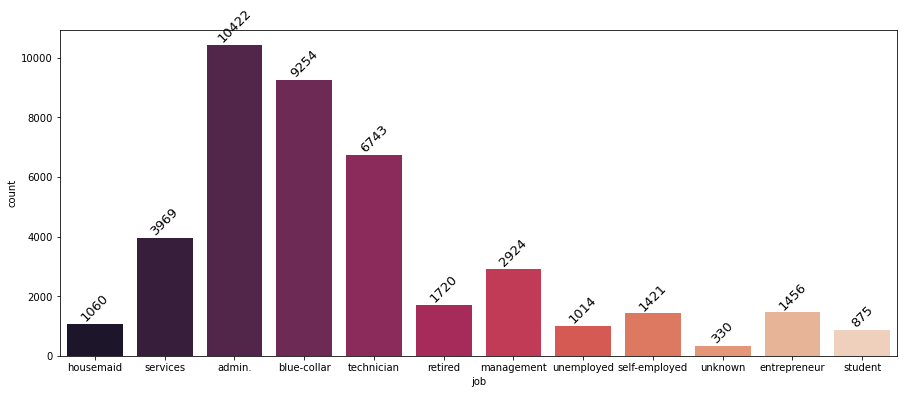

Marital


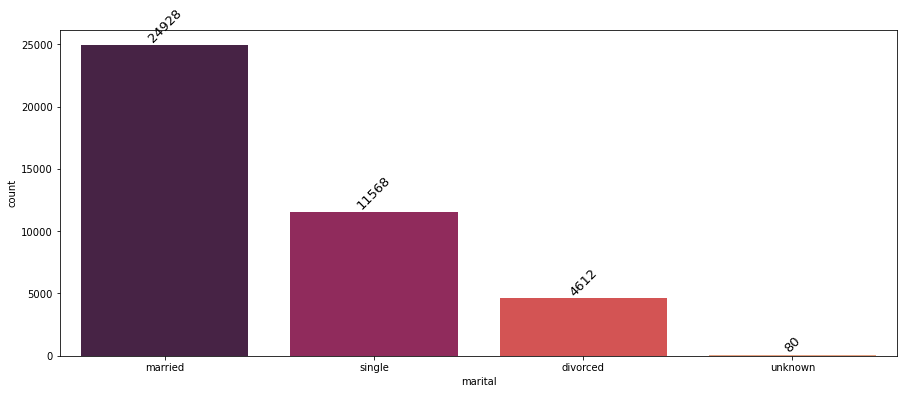

Education


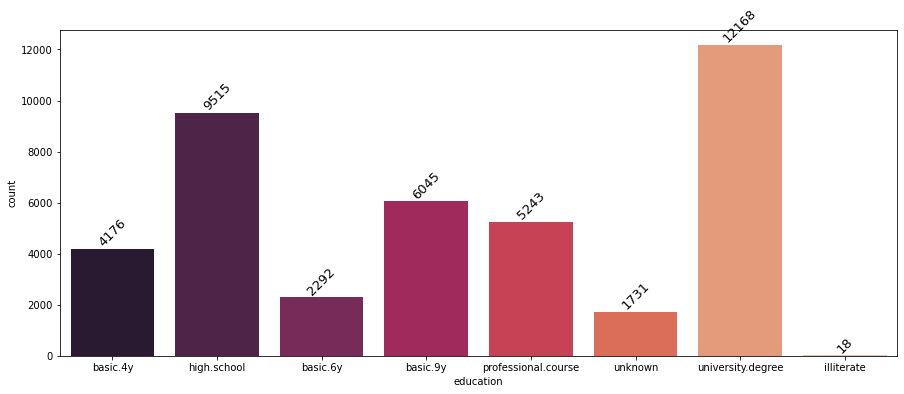

Default


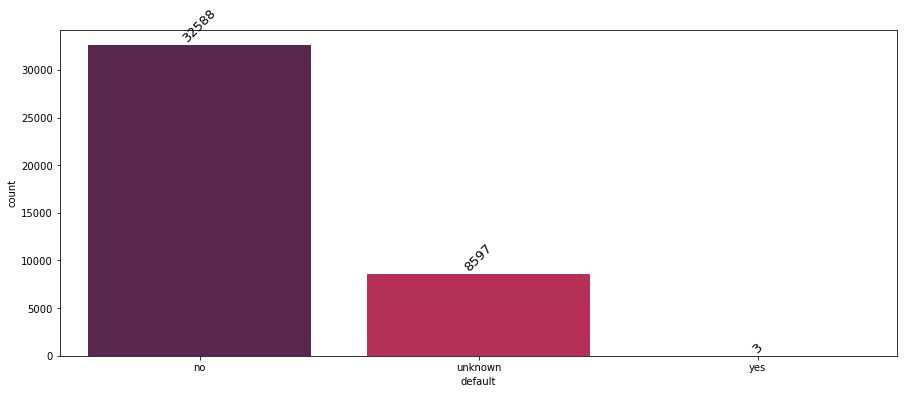

Housing


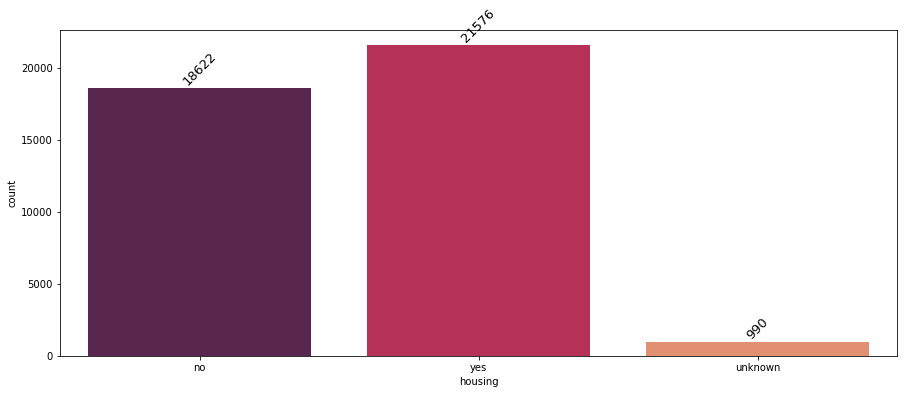

Loan


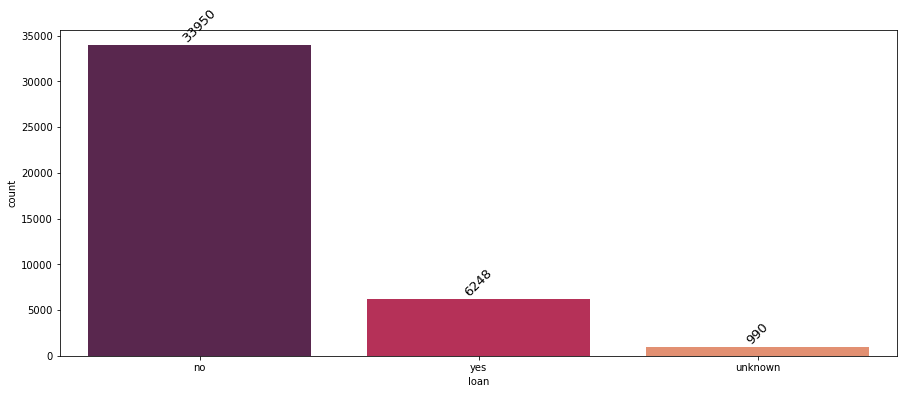

Contact


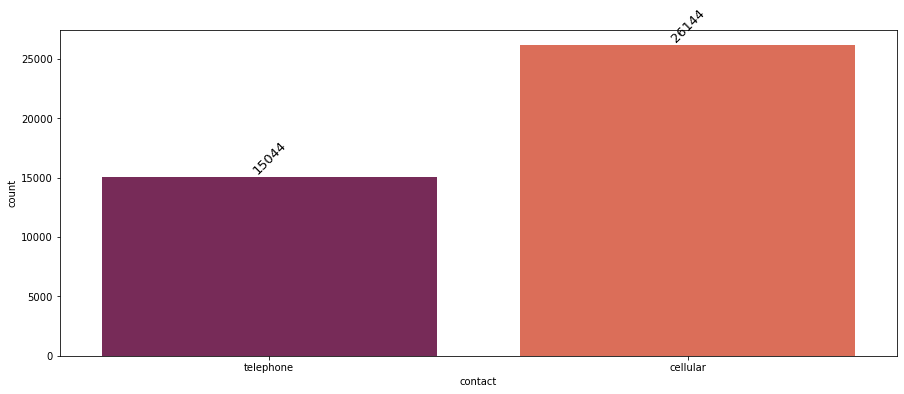

Month


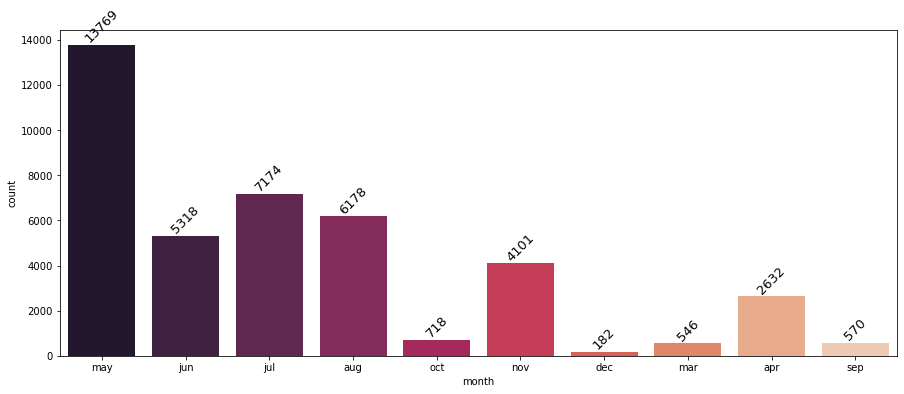

Day_Of_Week


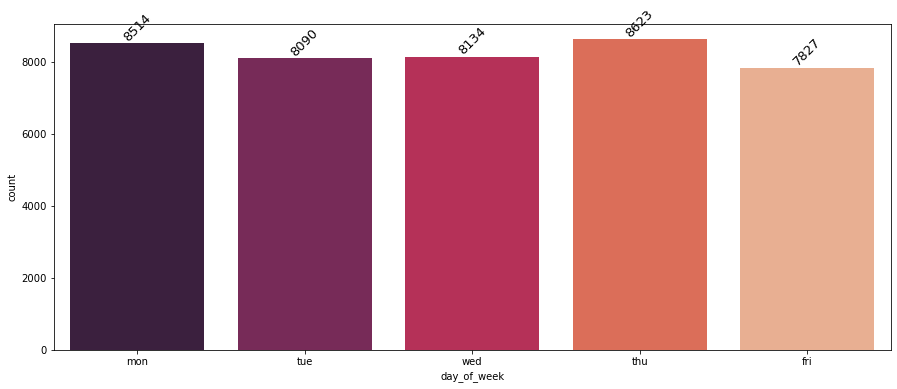

Poutcome


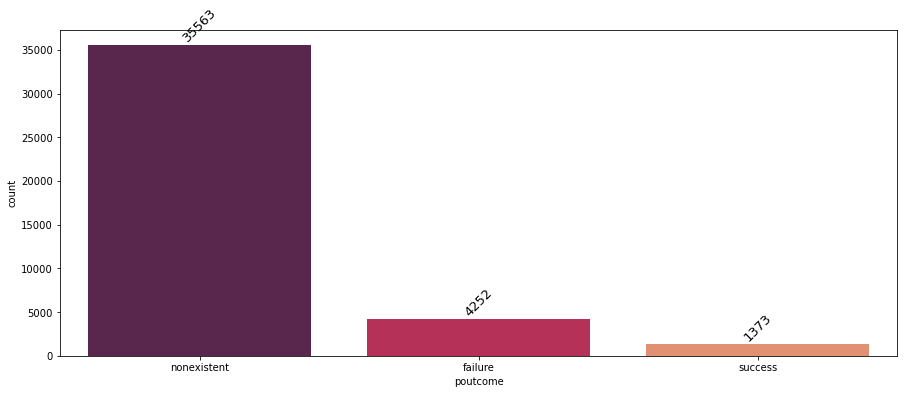

In [14]:
categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
for column in categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column],palette="rocket")
    annotation()
    plt.show()

### Multivariant analysis for categorical variables

Job


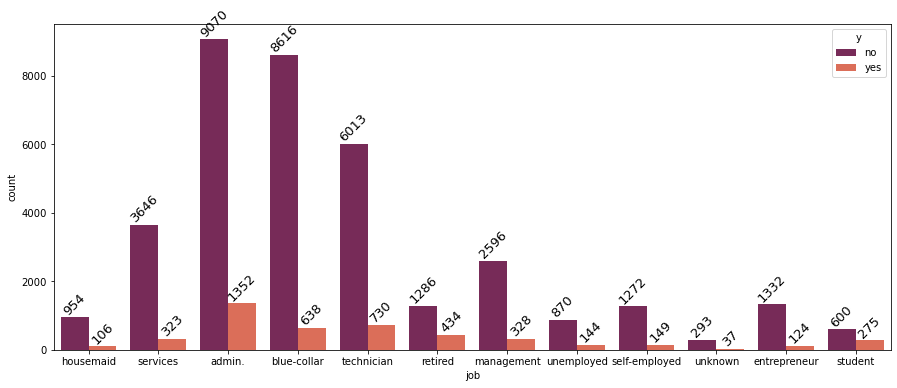

Marital


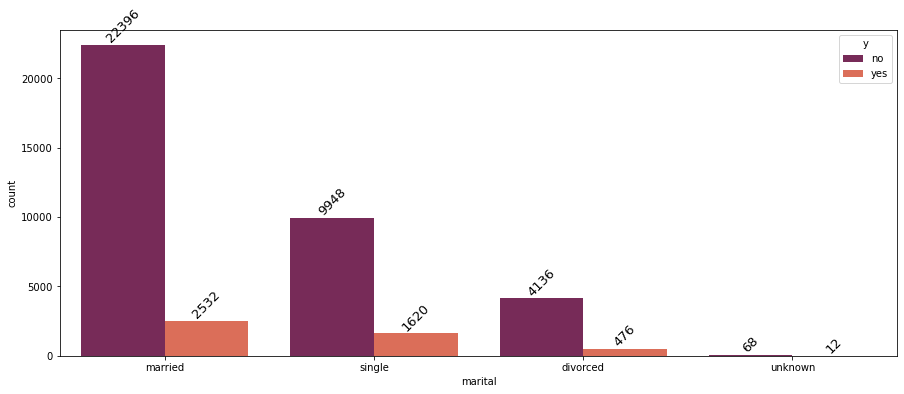

Education


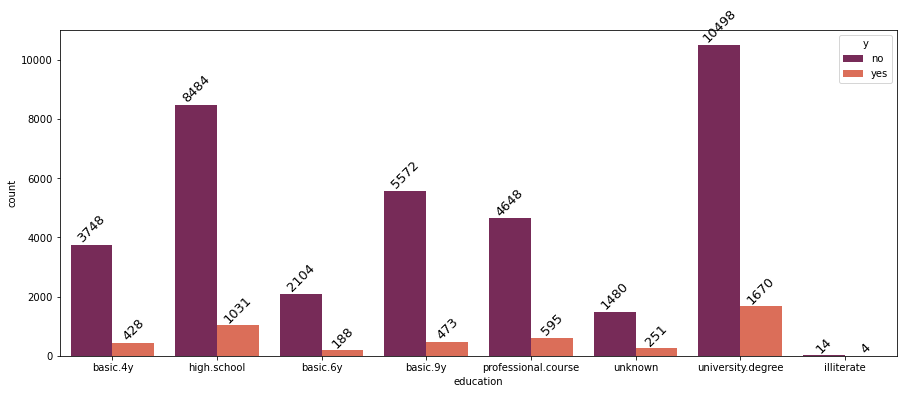

Default


ValueError: cannot convert float NaN to integer

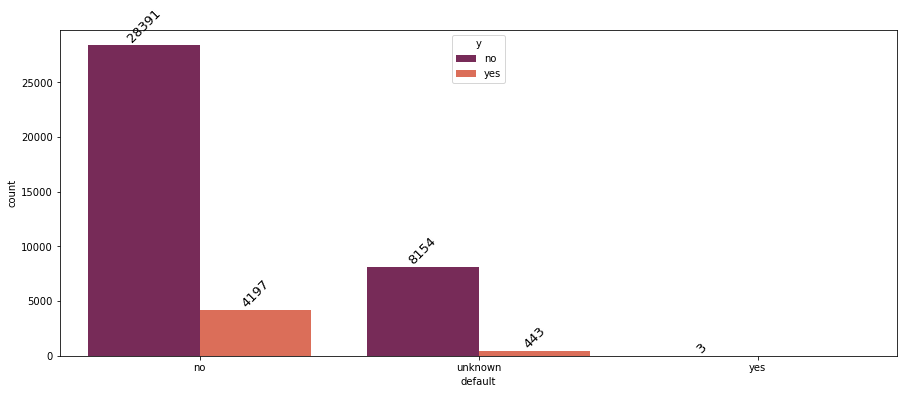

In [22]:
for column in categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"],palette="rocket")
    annotation()
    plt.show()

### Multivariant analysis for Numerical Variable

<AxesSubplot:>

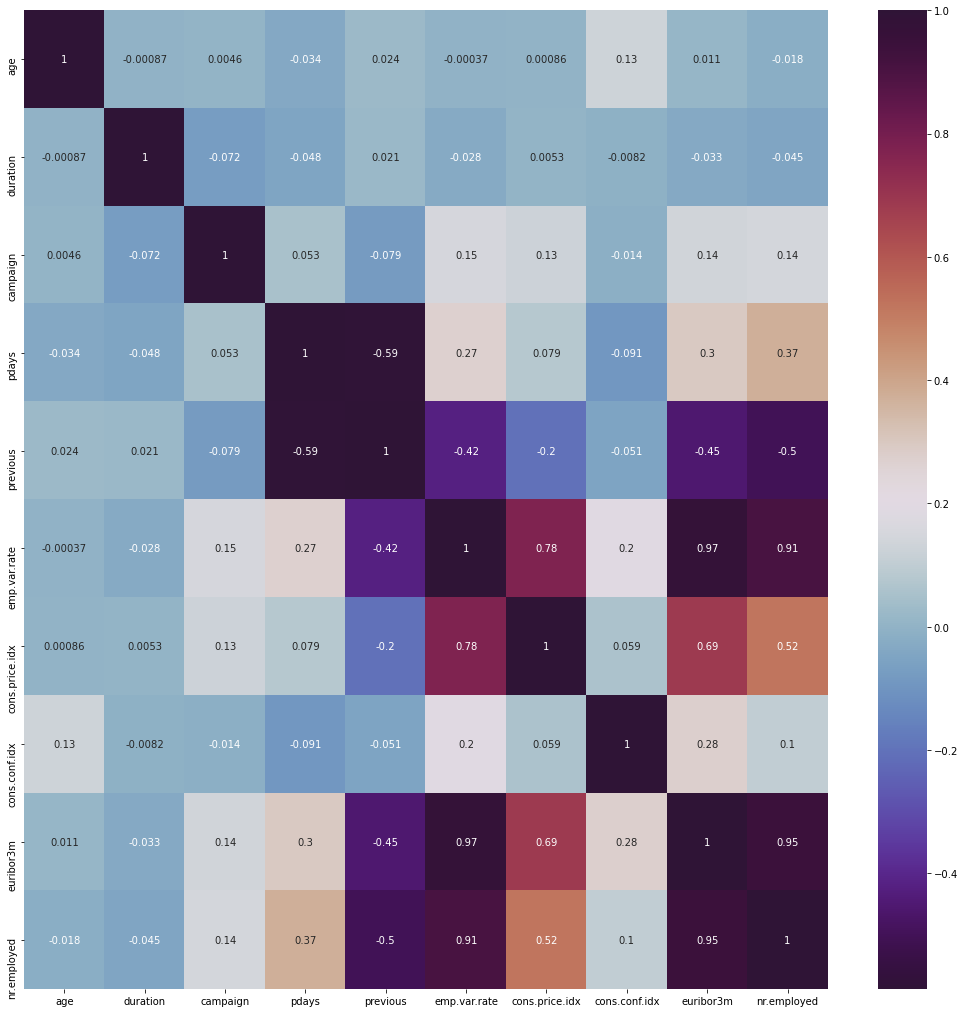

In [23]:
### finding correlation between each other 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap= 'twilight_shifted') ### plotting corelated values using heatmap

In [24]:
### function for getting high variables of indepentent features 
def correlation(dataset, threshold):
    col_corr = set()  ### creat a set for place a corelated columns
    co_pearson = dataset.corr()
    for i in range(len(co_pearson.columns)):
        for j in range(i):
            if abs (co_pearson.iloc[i, j]) > threshold: ### abs for negative corelation
                colname = co_pearson.columns[i]    
                col_corr.add(colname)
    return col_corr

In [25]:
co_columns = correlation(df, 0.75) ### fixing threshold value as 70%
print()
print("Highly co related columns are:",co_columns)### poutcome and p
print()


Highly co related columns are: {'nr.employed', 'cons.price.idx', 'euribor3m'}



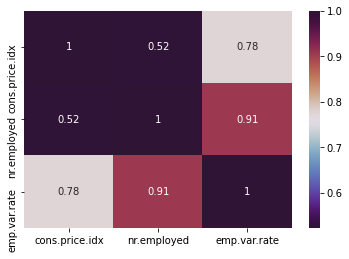

In [26]:
sns.heatmap(df[["cons.price.idx", "nr.employed","emp.var.rate"]].corr(), annot=True, cmap= 'twilight_shifted')
plt.show()

In [27]:
df_y = df.groupby('y')

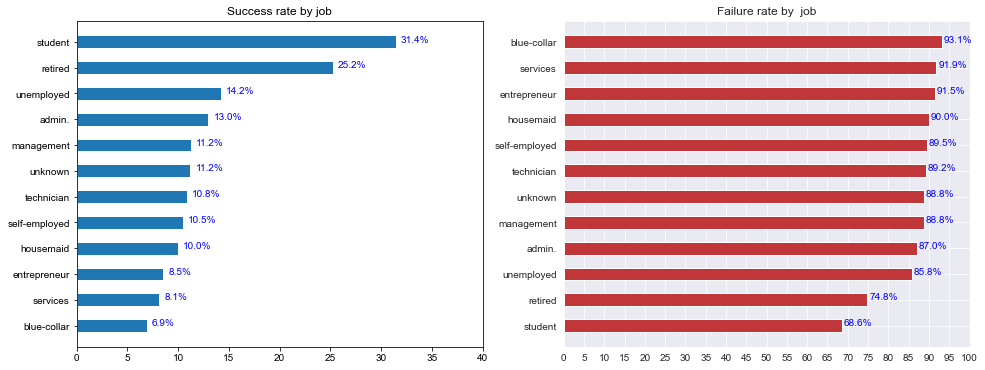

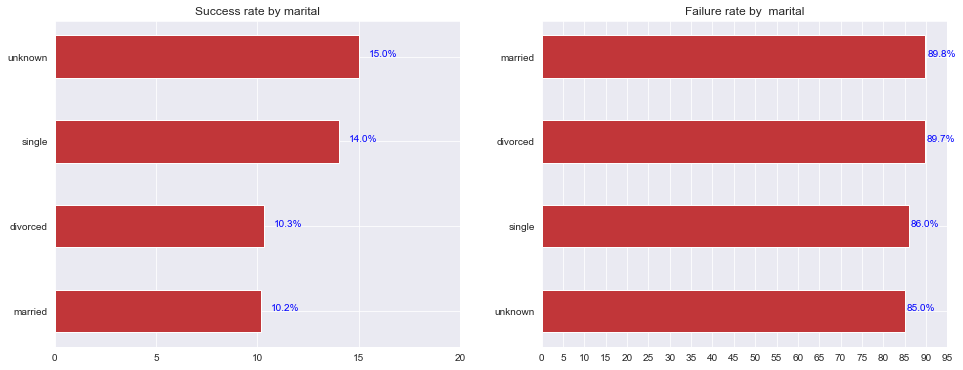

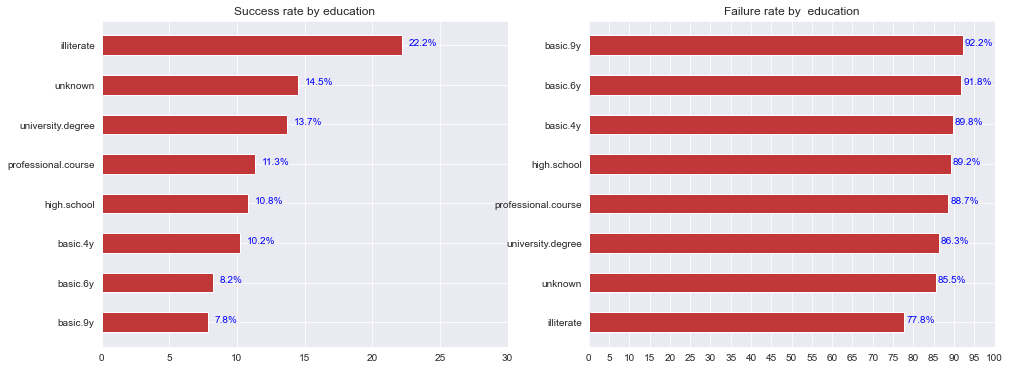

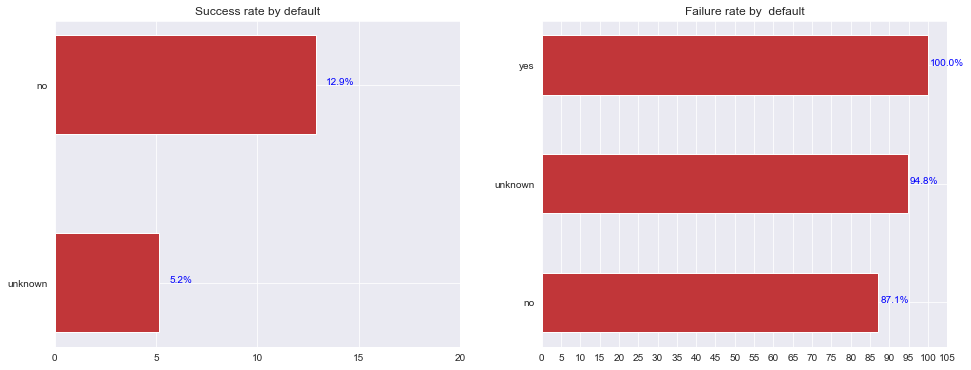

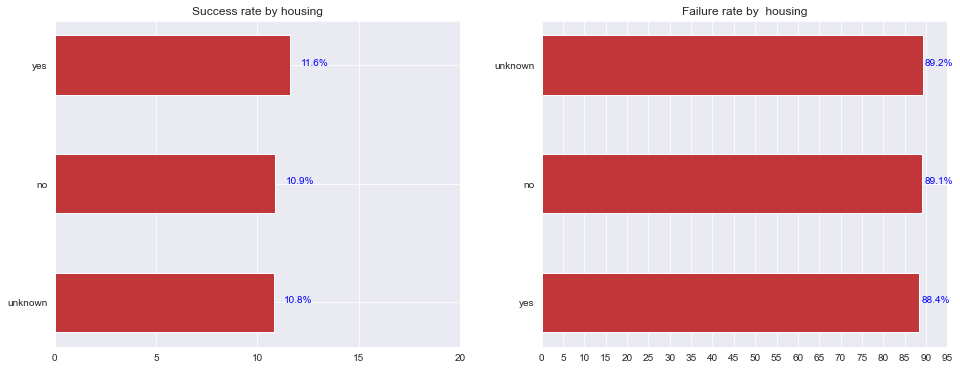

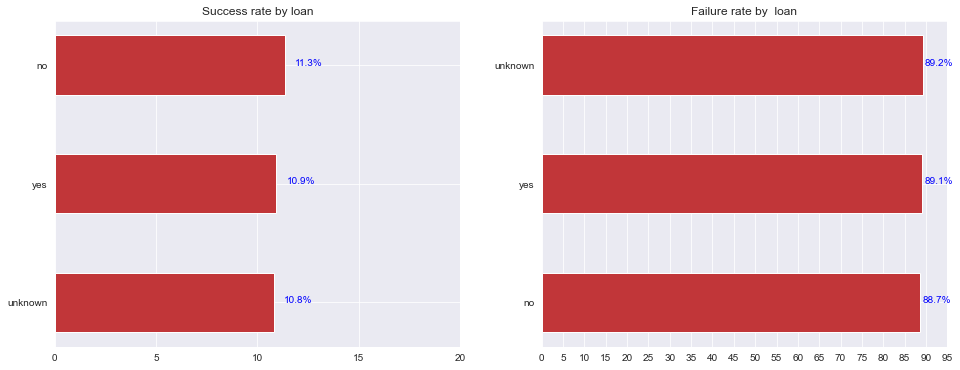

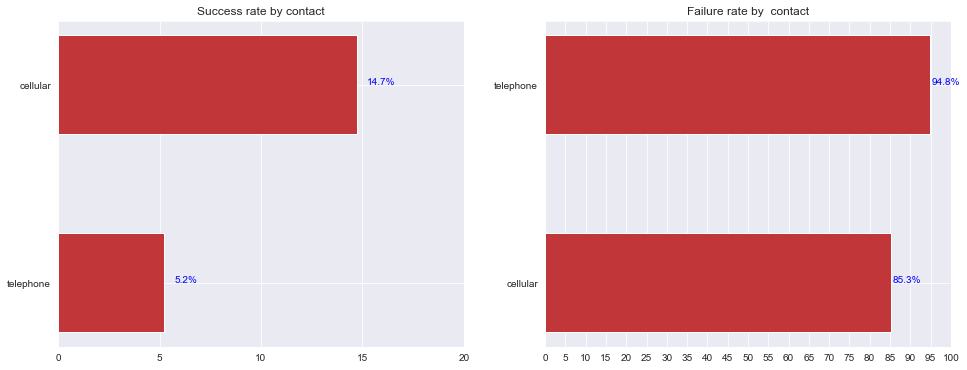

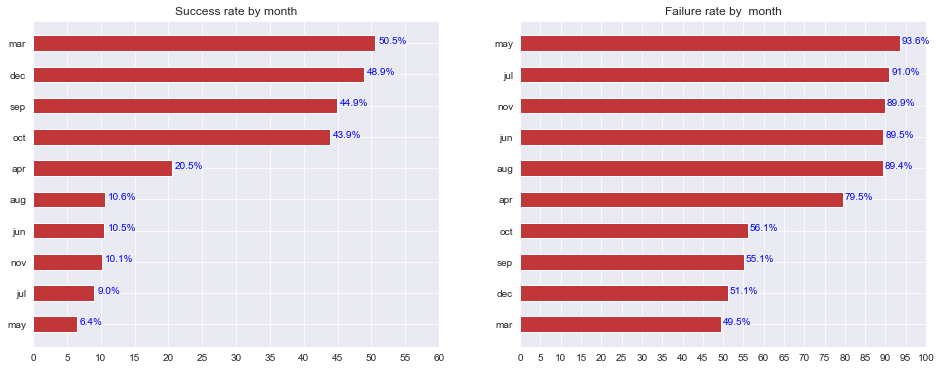

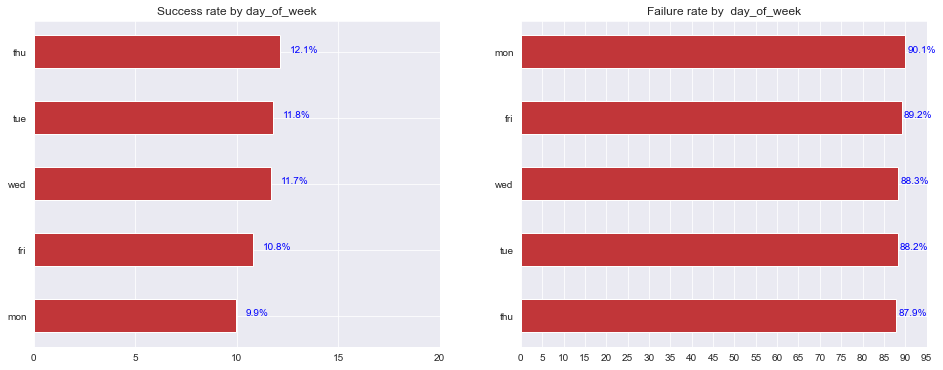

In [28]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

    sns.set_style(palette_style)
    sns.set_palette(palette_color)

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks( range(0, round(max(array)) +bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    #plt.show()
    return plt
def feature_perc(feature,groupby= 'yes'):

    count = df_y.get_group(groupby)[feature].value_counts()
    total_count = df[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc 
for column in categorical[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()

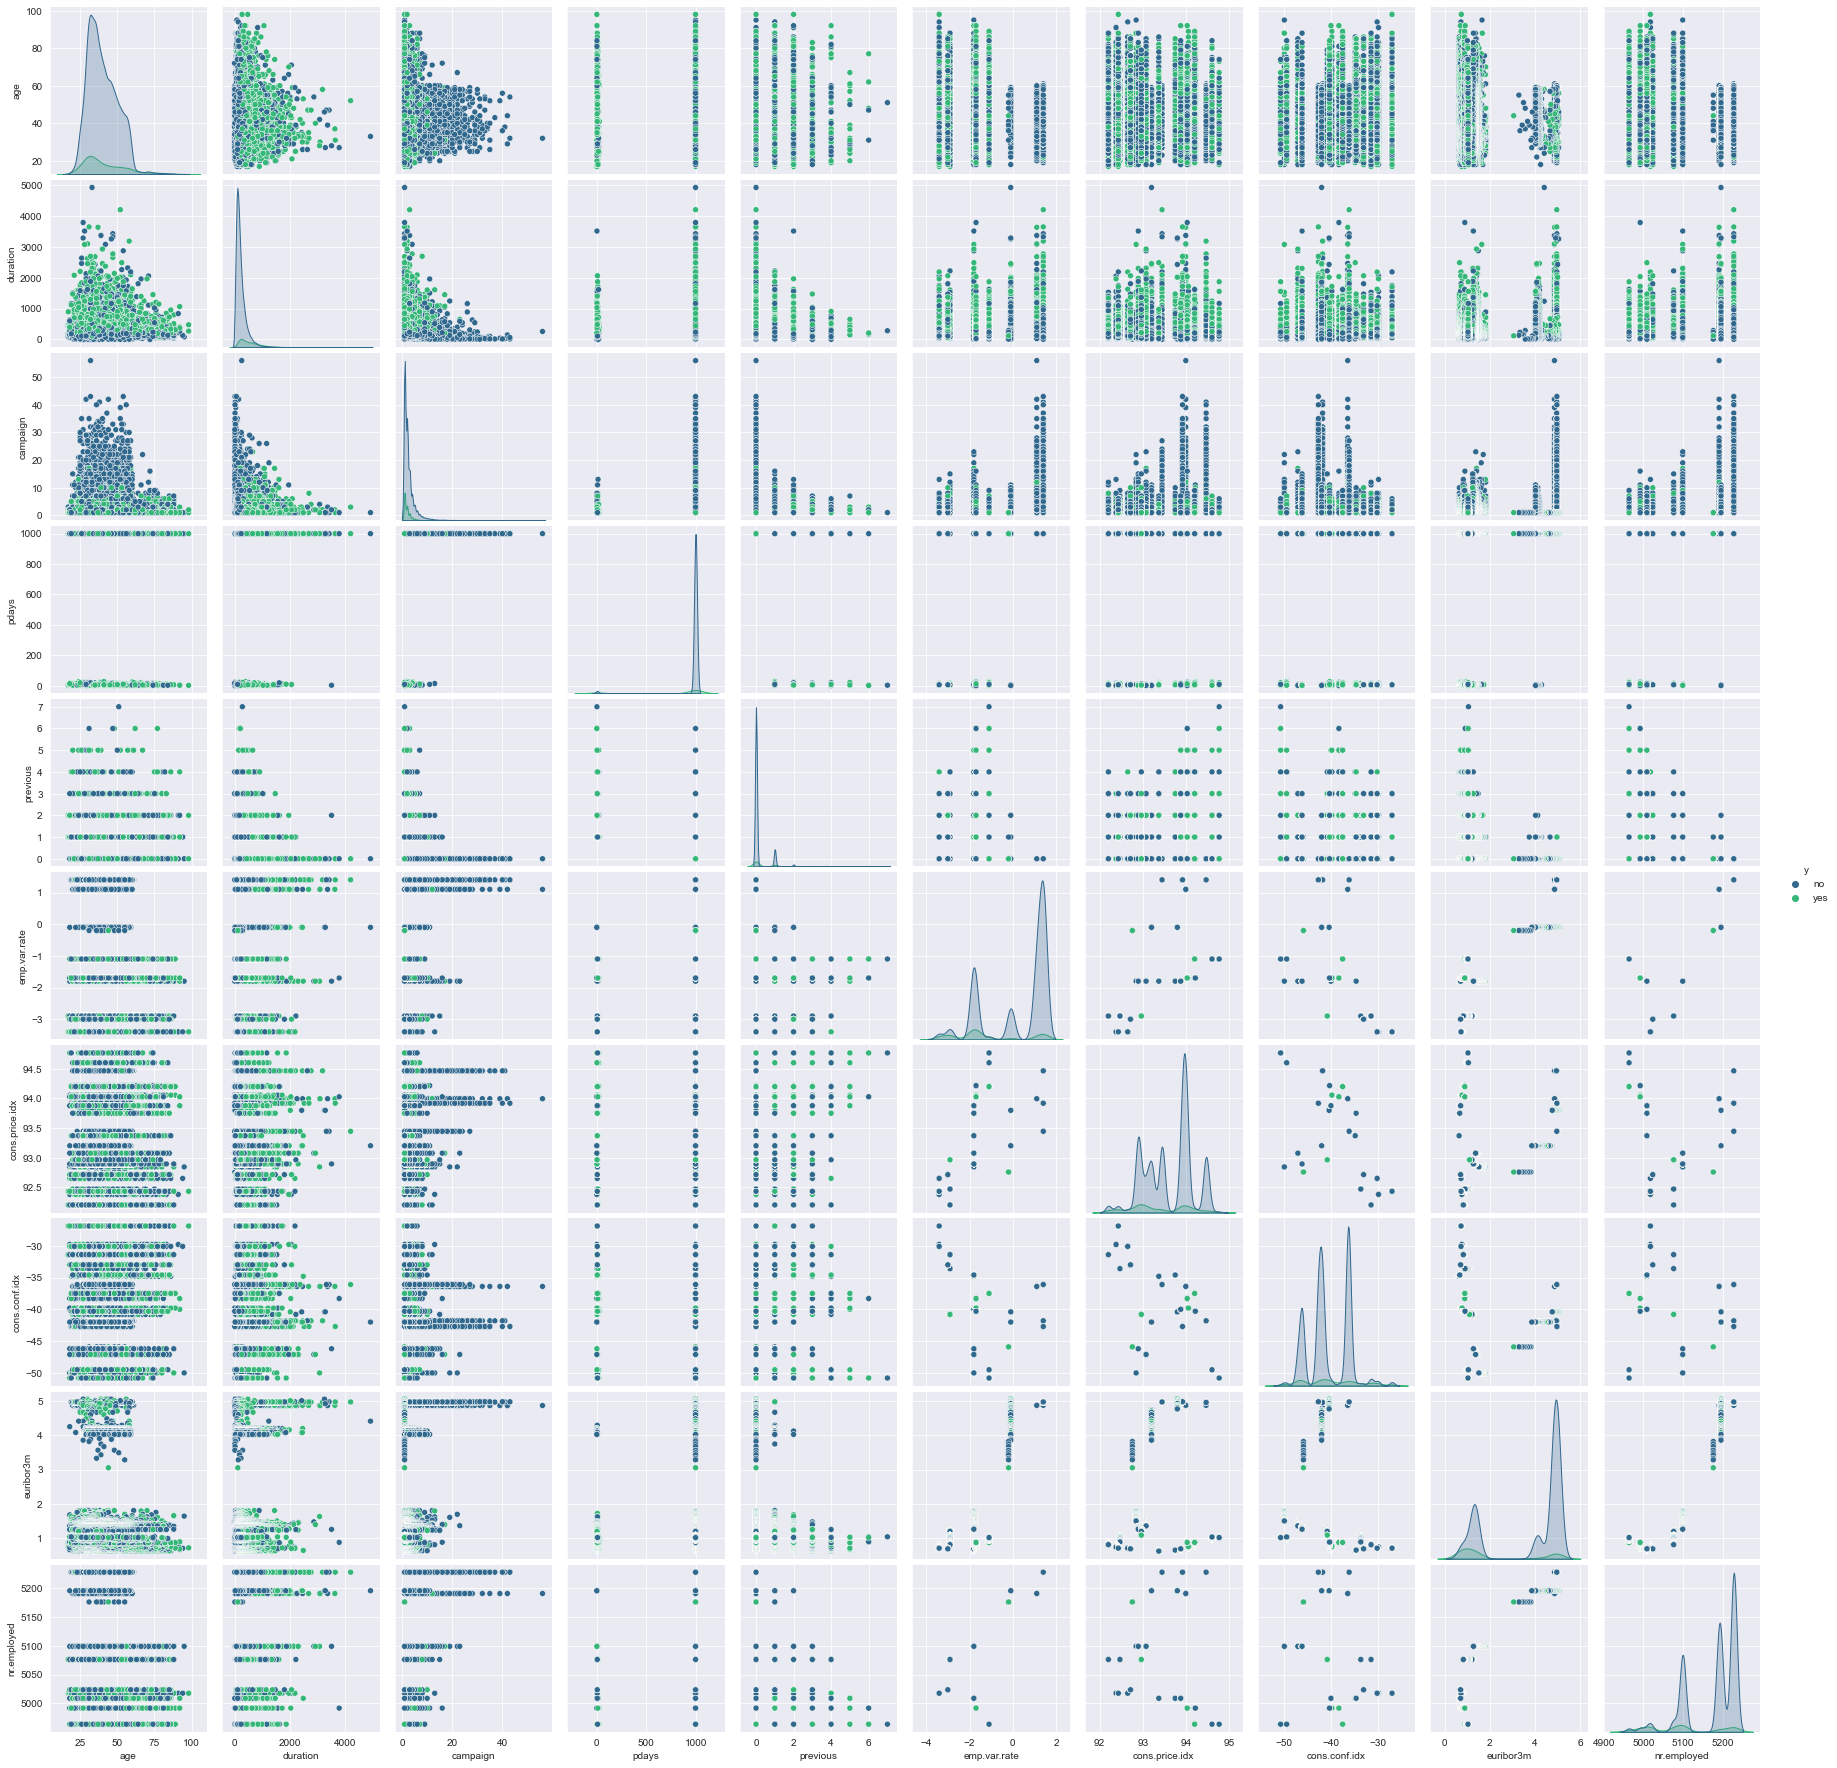

In [29]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df,palette='viridis')
plt.show()

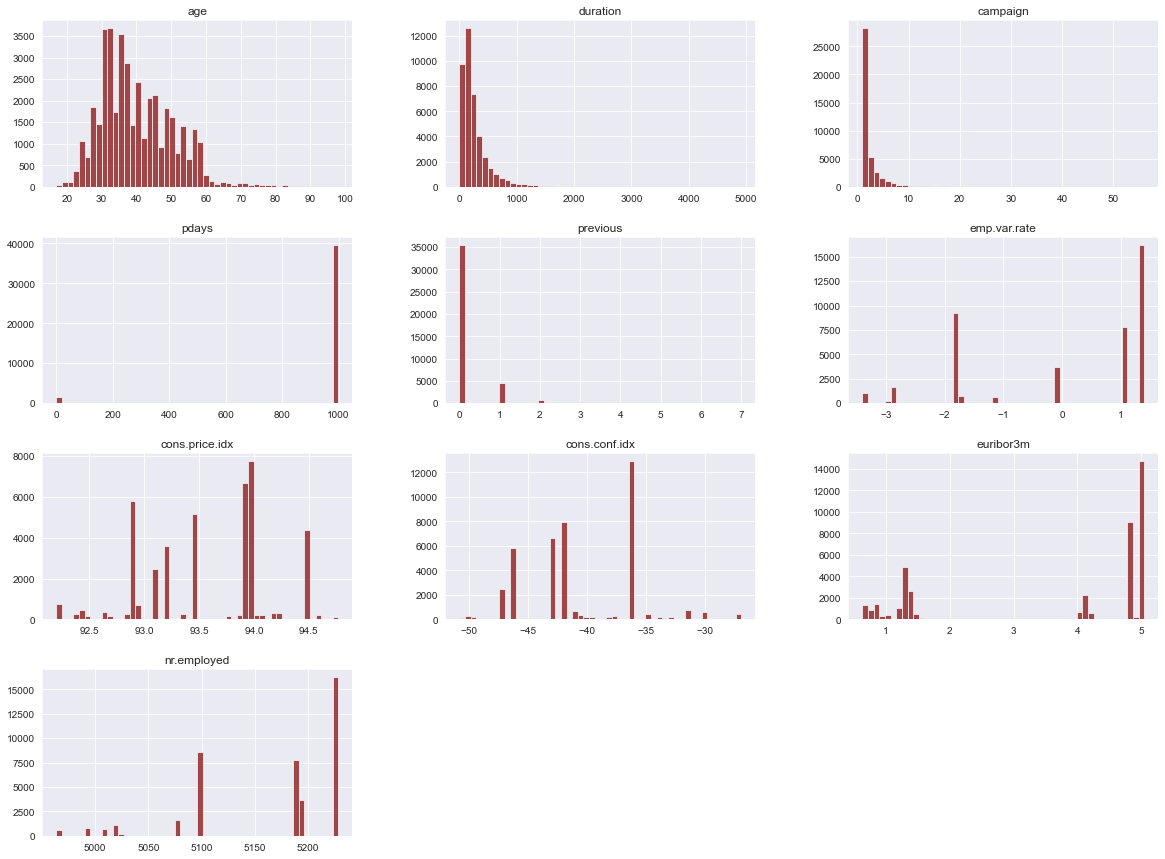

In [30]:
#histogram of all the features 
df.hist(bins=50, figsize=(20,15),color='maroon',alpha=0.7)
plt.show()


In [31]:
# 1.our target variable is imbalance.thus,need to balance our dataset to tackling overfitting.
# 2. 'cons.price.idx', 'euribor3m', 'nr.employed' columns are highly co related with each other.so, we consider those column   
#    before fitting the model.
# 3. If the total number of contacts generated during this campaign and for this client exceeds 23, 
# there is a very good chance that the client will not sign up for a term deposit.
# Even if we contact someone more than eight times, the likelihood is still minimal.
# 4. However, it is critical to note that no client should be contacted more than eight times during each campaign.
# 5. Consumer price index: If this value is high, the likelihood of a client not subscribing increases slightly.
# 6. Previous: If we contact a client before launching a campaign, there's a good probability they'll sign up. All values
#greater than two were transformed to two.
# 7. person who holds the university degree, has a high number in this campaign.
# 8. age categories 25 to 35 are high number.
# 9. Around 60% of client were approached were married.
# 10. If a client took the term deposit last time than there is higher chances of that client subscribing to it again.
#11.Default variable has not creat any impact on subscribing of client for term deposit. 
# we can see with no as input client took the term deposit and client having credit are not taking term deposit,
# we also consider this features before training.

# Data Pre-processing

### Label encoding

In [32]:
categorical = df.dtypes[df.dtypes == 'object'].index
labling = pd.DataFrame()

for column in categorical:
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    labling[column] = df[column]
    labling['_'+column] =  labelencoder.inverse_transform(df[column])

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [35]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [36]:
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

In [37]:
df.pdays.value_counts()

0     39673
20     1311
6       196
3         8
Name: pdays, dtype: int64

### Balancing the dataset

In [38]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=36962,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df.y.value_counts()

1    36962
0    36548
Name: y, dtype: int64

# Data Splitting

In [39]:
X = df.drop("y", axis=1)
Y = df['y']

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=42)

In [41]:
Y_train.value_counts() # we can see yes and no are equally trained here

1    27735
0    27397
Name: y, dtype: int64

# Feature Selection

<AxesSubplot:>

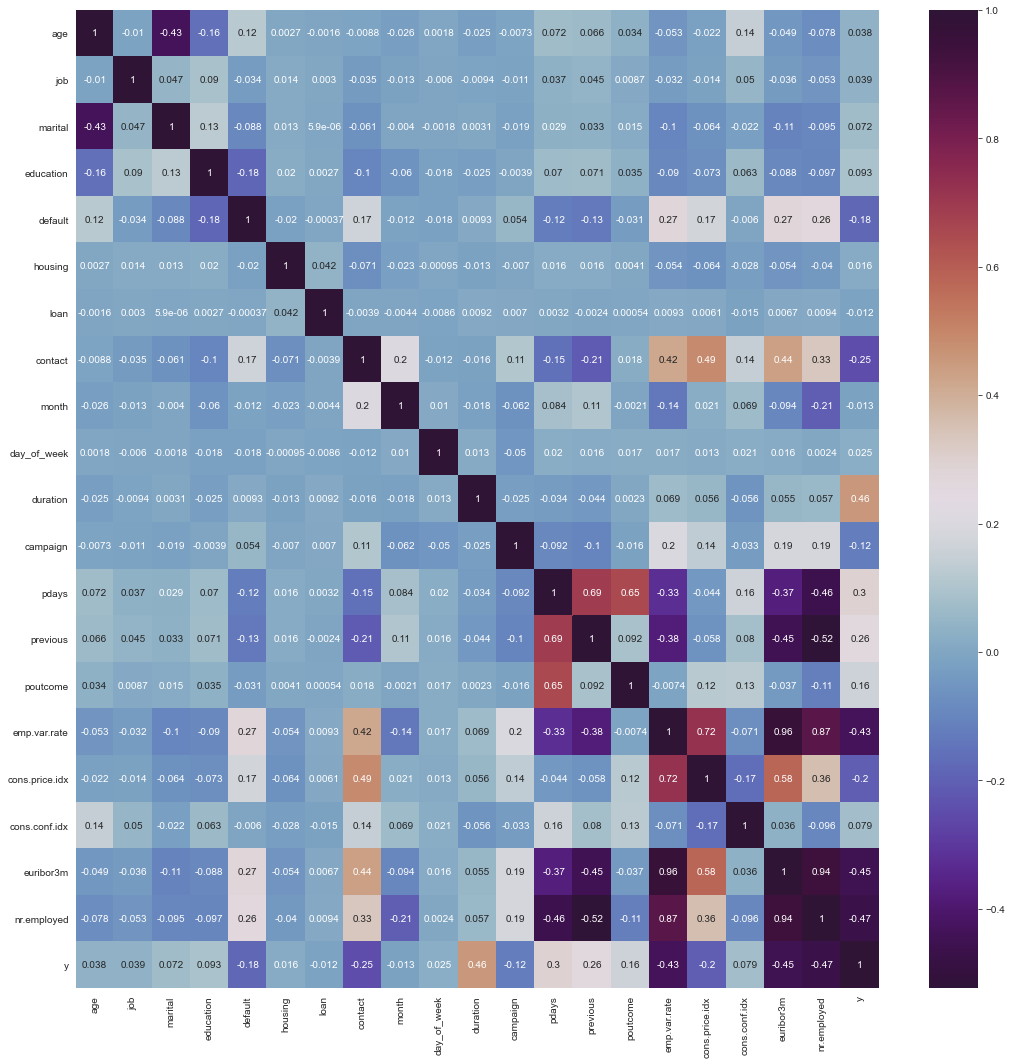

In [42]:



### finding correlation between each other 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap= 'twilight_shifted') ### plotting corelated values using heatmap

[0.06186959 0.0433415  0.0278964  0.04207682 0.01446148 0.02071464
 0.01605891 0.01633909 0.01512091 0.03884972 0.32353854 0.04374368
 0.0247502  0.0093112  0.01996246 0.05029472 0.01843053 0.02527367
 0.12349921 0.06446672]


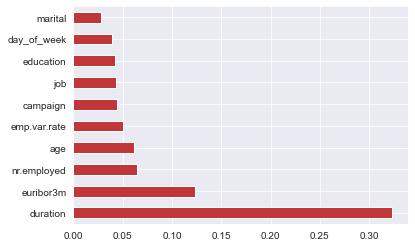

In [43]:


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Assigning and Splitting after feature selection

In [44]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [45]:
x=df[["marital","day_of_week","education","job","campaign","emp.var.rate","nr.employed","age","euribor3m","duration"]]

In [46]:
x.head()

,marital,day_of_week,education,job,campaign,emp.var.rate,nr.employed,age,euribor3m,duration
0,1,1,0,3,1,1.1,5191.0,56,4.857,261
1,1,1,3,7,1,1.1,5191.0,57,4.857,149
2,1,1,3,7,1,1.1,5191.0,37,4.857,226
3,1,1,1,0,1,1.1,5191.0,40,4.857,151
4,1,1,3,7,1,1.1,5191.0,56,4.857,307


In [47]:
y=df.y # assigning y values

# Feature Scaling

In [53]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42) # data splitting

# Artifical Neural Networks

In [189]:
pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached protobuf-3.20.1-cp38-cp38-win_amd64.whl (904 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.25.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.44.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.

In [49]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [64]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(sc.fit_transform(x_train), y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
3694/3694 [==============================] - 6s 2ms/step - loss: 0.5155 - accuracy: 0.7560 - val_loss: 0.3774 - val_accuracy: 0.8427
Epoch 2/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3670 - accuracy: 0.8517 - val_loss: 0.3476 - val_accuracy: 0.8587
Epoch 3/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3501 - accuracy: 0.8579 - val_loss: 0.3393 - val_accuracy: 0.8612
Epoch 4/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3434 - accuracy: 0.8593 - val_loss: 0.3352 - val_accuracy: 0.8631
Epoch 5/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3397 - accuracy: 0.8607 - val_loss: 0.3334 - val_accuracy: 0.8628
Epoch 6/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3373 - accuracy: 0.8616 - val_loss: 0.3320 - val_accuracy: 0.8633
Epoch 7/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3355 - accuracy: 0.8617 - val_loss: 0.3305 - val_ac

3694/3694 [==============================] - 5s 1ms/step - loss: 0.3128 - accuracy: 0.8705 - val_loss: 0.3095 - val_accuracy: 0.8710
Epoch 58/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3129 - accuracy: 0.8697 - val_loss: 0.3101 - val_accuracy: 0.8710
Epoch 59/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3125 - accuracy: 0.8702 - val_loss: 0.3093 - val_accuracy: 0.8699
Epoch 60/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3122 - accuracy: 0.8702 - val_loss: 0.3097 - val_accuracy: 0.8693
Epoch 61/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3121 - accuracy: 0.8696 - val_loss: 0.3087 - val_accuracy: 0.8713
Epoch 62/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3118 - accuracy: 0.8700 - val_loss: 0.3100 - val_accuracy: 0.8721
Epoch 63/100
3694/3694 [==============================] - 5s 1ms/step - loss: 0.3118 - accuracy: 0.8702 - val_loss: 0.3079 - val_accuracy

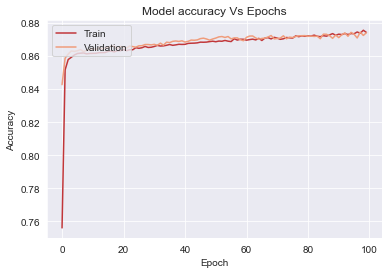

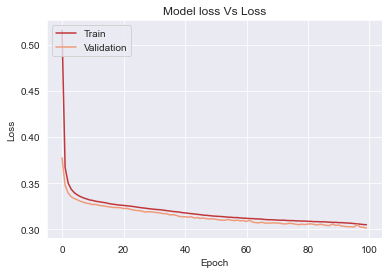

In [65]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model Building with pipeline and Principal Compound Analysis

#### models involues in pipeline

#### 1. Principal compound analysis
#### 2. logistics regression
#### 3. Decision Tree Classification
#### 4. Random Forest classification

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [95]:
pipeline_log=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_tree=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_forest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])
## LEts make the list of pipelines
pipelines = [pipeline_log, pipeline_tree, pipeline_forest]
best_accuracy=0.0
best_classifier=0
best_pipeline=""
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [96]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.7112308194580477
Decision Tree Test Accuracy: 0.942975296550223
RandomForest Test Accuracy: 0.9504298617912722


In [99]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


# Logistics regression Metrics

In [102]:
y_pred_log= pipeline_log.predict(x_test)
log_pred_prob = pipeline_log.predict_proba(x_test)

In [108]:
from sklearn import metrics
y_pred_log= pipeline_log.predict(x_test)
print(metrics.classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      9151
           1       0.71      0.71      0.71      9227

    accuracy                           0.71     18378
   macro avg       0.71      0.71      0.71     18378
weighted avg       0.71      0.71      0.71     18378



# Decision Tree Classification Metrics

In [110]:
y_pred_tree= pipeline_tree.predict(x_test)
tree_pred_prob = pipeline_tree.predict_proba(x_test)

In [111]:
from sklearn import metrics
y_pred_tree= pipeline_tree.predict(x_test)
print(metrics.classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9151
           1       0.90      1.00      0.95      9227

    accuracy                           0.94     18378
   macro avg       0.95      0.94      0.94     18378
weighted avg       0.95      0.94      0.94     18378



# Random Forest Classification Metrics

In [112]:
y_pred_forest= pipeline_forest.predict(x_test)
forest_pred_prob = pipeline_forest.predict_proba(x_test)

In [113]:
from sklearn import metrics
y_pred_forest= pipeline_forest.predict(x_test)
print(metrics.classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      9151
           1       0.91      1.00      0.95      9227

    accuracy                           0.95     18378
   macro avg       0.95      0.95      0.95     18378
weighted avg       0.95      0.95      0.95     18378



# ROC and AUC curve

In [114]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, tree_pred_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, forest_pred_prob[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [121]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test,log_pred_prob[:,1])
auc_score2 = roc_auc_score(y_test,tree_pred_prob[:,1])
auc_score3 = roc_auc_score(y_test, forest_pred_prob[:,1])


print()
print("Logistics Regression score:",auc_score1)
print()
print("Decision Tree score:",auc_score2)
print()
print("Random Forest score:",auc_score3)
print()


Logistics Regression score: 0.7336086300915423

Decision Tree score: 0.9427447991341447

Random Forest score: 0.9973923885819833



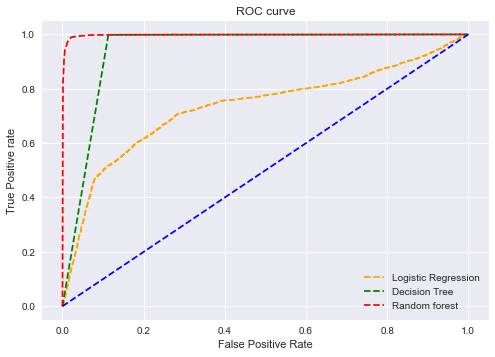

In [118]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();